


# compare EXTBNB data to *cosmic* pairs in our overlay

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# import data

In [2]:
debug = 1
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/extBNBvsCosmicOverlay/'

In [3]:
Nevents

{'MC-BNB/Cosmic-DATA overlay': 96350,
 'MC-BNB/Cosmic-DATA overlay POT': 9.773e+19,
 'MC-BNB/Cosmic-MC overlay': 358800,
 'MC-BNB/Cosmic-MC overlay POT': 3.61901e+20,
 'OffBeam after sof.trig.': 380602,
 'OffBeam before sof.trig.': 8529852.084267145,
 'OffBeam sof.trig. efficiency': 0.04462,
 'OnBeam POT': 4.93e+19,
 'OnBeam after sof.trig.': 544114,
 'OnBeam before sof.trig.': 10596183.05744888,
 'OnBeam sof.trig. efficiency': 0.05135,
 'v04 after sof.trig.': 378787,
 'v05 after sof.trig.': 1815}

## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [4]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) MC-BNB + Cosmic DATA overlay 

In [5]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
soft Pmiss,16.3%,95.4%,37.3%,70.7%,$p_{miss}<0.30$ GeV/c,16.3% (621),0.7% (29),0.0% (1),37.3% (460)
tight Pt,9.3%,95.7%,22.4%,74.9%,$p_{t}<0.15$ GeV/c,9.3% (354),0.4% (16),0.0% (0),22.4% (277)


In [6]:
reduced_OffBeam = dict()
# pure_cosmic = OffBeamFV[(OffBeamFV['pdg_long']==-9999) & (OffBeamFV['pdg_short']==-9999)]
reduced_OffBeam['no cut'] = OffBeamFV

# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]

# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]

# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]

# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]

# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]

# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

# lets get to buissiness

In [7]:
for col in reduced_OffBeam['no cut'].columns: print col

Unnamed: 0
run
subrun
event
vertex_id
x
y
z
track_id
PIDa_long
PIDa_short
l_long
l_short
PIDa_small_PIDa
PIDa_large_PIDa
l_small_PIDa
l_large_PIDa
PIDa_assigned_muon
PIDa_assigned_proton
l_assigned_muon
l_assigned_proton
ClosestFlash_YZdistance_assigned_muon
ClosestFlash_YZdistance_assigned_proton
ClosestFlash_TotalPE_assigned_muon
ClosestFlash_TotalPE_assigned_proton
startx_assigned_muon
starty_assigned_muon
startz_assigned_muon
startx_assigned_proton
starty_assigned_proton
startz_assigned_proton
endx_assigned_muon
endy_assigned_muon
endz_assigned_muon
endx_assigned_proton
endy_assigned_proton
endz_assigned_proton
distance
delta_phi
delta_theta
theta_12
reco_Ev
reco_Q2
reco_Xb
reco_y
reco_W2
reco_Pt
reco_theta_pq
reco_Pmu
reco_Pmu_x
reco_Pmu_y
reco_Pmu_z
reco_Pmu_theta
reco_Pmu_phi
reco_Pp
reco_Pp_x
reco_Pp_y
reco_Pp_z
reco_Pp_theta
reco_Pp_phi
truth_l_assigned_muon
truth_l_assigned_proton
truth_Pmu
truth_Pmu_x
truth_Pmu_y
truth_Pmu_z
truth_Pmu_theta
truth_Pmu_phi
truth_Pp
truth_Pp_x


# before any cut

NameError: global name 'OffBeamFV' is not defined

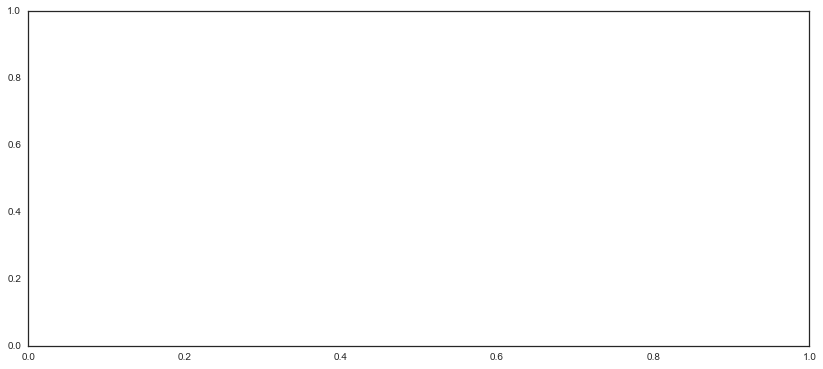

In [8]:
for var,x_label,bins in zip(['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']                                      
                                ,['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
                                ,[np.linspace(0,5,25),np.linspace(0,150,41),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,51),np.linspace(0,360,51),np.linspace(-0.01,2,26)]):
    extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam['no cut']
                      ,cosmic_overlay_sample=reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
                      ,var=var , x_label=x_label, bins=bins )
    plt.savefig(figures_path+var+'_'+'before_cuts.pdf') 

# After application of cuts

In [ ]:
for cut_name in ['PIDa','length','non-collinearity','vertex activity','delta phi','soft Pt']:
    for var,x_label,bins in zip(['distance','l_assigned_muon','l_assigned_proton','PIDa_assigned_proton','PIDa_assigned_muon','theta_12','delta_phi','reco_Pt']                                      
                                ,['$d_{1,2}$ [cm]',r'$l_{\mu}$ [cm]',r'$l_{p}$ [cm]',r'$PID_a^{p}$',r'$PID_a^{\mu}$',r'$\theta^{12}$ [deg.]',r'$\Delta \phi$ [deg.]','$p_{t}$ [GeV/c]']
                                ,[np.linspace(0,5,25),np.linspace(0,150,41),np.linspace(0,100,41),np.linspace(0,40,41),np.linspace(0,40,41),np.linspace(0,180,51),np.linspace(0,360,51),np.linspace(-0.01,2,26)]):
        extBNBvsCosmicOverlay(OffBeamSample=reduced_OffBeam[cut_name]
                      ,cosmic_overlay_sample=reduced_MCbnbDATAcosmicSamples[cut_name]['cosmic']
                      ,var=var , x_label=x_label, bins=bins )
        plt.savefig(figures_path+var+'_'+'after_cut_'+cut_name+'.pdf') 

In [11]:
sam = reduced_MCbnbDATAcosmicSamples['no cut']['cosmic']
pure_cosmic = sam[(sam['pdg_long']==-9999) & (sam['pdg_short']==-9999)]
print len(reduced_MCbnbDATAcosmicSamples['no cut']['cosmic'])
print len(pure_cosmic)

22562
20513
